### Project 2 - Movielens Case Study - Shivam Gupta

**DESCRIPTION**

**Background of Problem Statement :**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**Problem Objective :**

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

**Domain:** Entertainment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

Import the three datasets

In [2]:
rating_col = ['UserID','MovieID','Rating','Timestamp']
ratings = pd.read_csv('/Users/shivamgupta/Documents/Simplilear-Project/Project-Done/DSPythonProject/ratings.dat', 
                      header=None,sep='::', engine='python', names=rating_col)

In [3]:
ratings.dropna(inplace=True)

In [4]:
ratings.head(1)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760


In [5]:
movie_col = ['MovieID','Title','Genres']
movies = pd.read_csv('/Users/shivamgupta/Documents/Simplilear-Project/Project-Done/DSPythonProject/movies.dat', 
                     header=None, sep='::', engine='python', names=movie_col)

In [6]:
movies.dropna(inplace=True)

In [7]:
movies.head(1)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [8]:
user_col = ['UserID','Gender','Age','Occupation','Zip Code']
users = pd.read_csv('/Users/shivamgupta/Documents/Simplilear-Project/Project-Done/DSPythonProject/users.dat',
                    header=None, sep='::', engine='python', names=user_col)

In [9]:
users.dropna(inplace=True)

In [10]:
users.head(1)

,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067


Create a new dataset [Master_Data] with the following columns - MovieID Title UserID Age Gender Occupation Rating.

In [11]:
master_data = ratings.merge(movies, on='MovieID', how='outer')

In [12]:
master_data.head(1)

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1.0,1193,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama


In [13]:
master_data = master_data.merge(users, on='UserID', how='outer')

In [14]:
master_data.dropna(inplace = True)

In [15]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip Code
0,1.0,1193,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama,F,1.0,10.0,48067
1,1.0,661,3.0,978302109.0,James and the Giant Peach (1996),Animation|Children's|Musical,F,1.0,10.0,48067
2,1.0,914,3.0,978301968.0,My Fair Lady (1964),Musical|Romance,F,1.0,10.0,48067
3,1.0,3408,4.0,978300275.0,Erin Brockovich (2000),Drama,F,1.0,10.0,48067
4,1.0,2355,5.0,978824291.0,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1.0,10.0,48067


In [16]:
master_data.drop(columns=['Timestamp','Genres','Zip Code']).head()

,UserID,MovieID,Rating,Title,Gender,Age,Occupation
0,1.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),F,1.0,10.0
1,1.0,661,3.0,James and the Giant Peach (1996),F,1.0,10.0
2,1.0,914,3.0,My Fair Lady (1964),F,1.0,10.0
3,1.0,3408,4.0,Erin Brockovich (2000),F,1.0,10.0
4,1.0,2355,5.0,"Bug's Life, A (1998)",F,1.0,10.0


Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution

In [17]:
master_data.loc[master_data['Age'] ==1, 'Age Group'] = 'Under 18'
master_data.loc[master_data['Age'] ==18, 'Age Group'] = '18-24'
master_data.loc[master_data['Age'] ==25, 'Age Group'] = '25-34'
master_data.loc[master_data['Age']==35, 'Age Group'] = '35-44'
master_data.loc[master_data['Age'] ==45, 'Age Group'] = '45-49'
master_data.loc[master_data['Age'] ==50, 'Age Group'] = '50-55'
master_data.loc[master_data['Age']==56, 'Age Group'] = '56+'

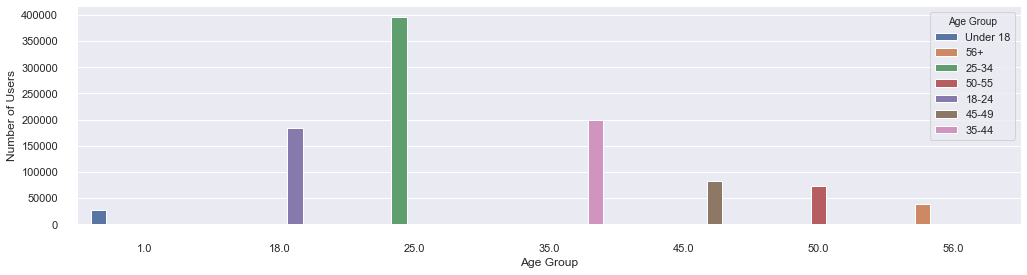

In [18]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(16.9,4)})
sns.countplot('Age',data=master_data, hue = 'Age Group')
sns.despine(offset=10, trim=True)
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

Text(0.5, 0, 'Age')

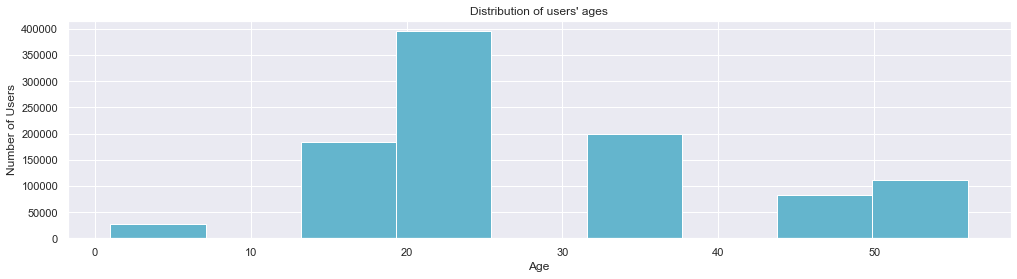

In [19]:
master_data.Age.plot.hist(bins=9, color = 'c')
plt.title("Distribution of users' ages")
plt.ylabel('Number of Users')
plt.xlabel('Age')

User rating of the movie “Toy Story”

In [20]:
user_rating_toy_story = master_data[master_data.Title.str.contains('Toy Story')][['UserID','Title',
            'Rating']].groupby(['Title'])['Rating'].agg(['sum','count']).reset_index()
print(user_rating_toy_story)

                Title     sum  count
0    Toy Story (1995)  8613.0   2077
1  Toy Story 2 (1999)  6687.0   1585


In [21]:
user_rating_toy_story['Overall_Rating'] = (user_rating_toy_story['sum']/user_rating_toy_story['count']).round()
user_rating_toy_story.drop(columns='sum',axis=1,inplace=True)
user_rating_toy_story.rename(columns = {'count':'Number_of_votes'}, inplace=True)
print(user_rating_toy_story)

                Title  Number_of_votes  Overall_Rating
0    Toy Story (1995)             2077             4.0
1  Toy Story 2 (1999)             1585             4.0


Top 25 movies by viewership rating

In [22]:
group_rating = master_data[['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
group_rating.rename(columns = {'count':'Number_of_votes','sum':'Total_rating'}, inplace = True)
group_rating['Overall_rating'] = (group_rating['Total_rating']/group_rating['Number_of_votes']).round()
print(group_rating.head())

                           Title  Total_rating  Number_of_votes  \
0         $1,000,000 Duck (1971)         112.0               37   
1           'Night Mother (1986)         236.0               70   
2      'Til There Was You (1997)         140.0               52   
3             'burbs, The (1989)         882.0              303   
4  ...And Justice for All (1979)         739.0              199   

   Overall_rating  
0             3.0  
1             3.0  
2             3.0  
3             3.0  
4             4.0  


In [23]:
top_25_movies = group_rating.sort_values(by=['Number_of_votes','Overall_rating'], 
                         ascending = False)[['Title','Number_of_votes','Overall_rating']].head(25).reset_index()
top_25_movies.drop(columns='index',inplace=True,axis=1)
print(top_25_movies)

                                                Title  Number_of_votes  \
0                              American Beauty (1999)             3428   
1           Star Wars: Episode IV - A New Hope (1977)             2991   
2   Star Wars: Episode V - The Empire Strikes Back...             2990   
3   Star Wars: Episode VI - Return of the Jedi (1983)             2883   
4                                Jurassic Park (1993)             2672   
5                          Saving Private Ryan (1998)             2653   
6                   Terminator 2: Judgment Day (1991)             2649   
7                                  Matrix, The (1999)             2590   
8                           Back to the Future (1985)             2583   
9                    Silence of the Lambs, The (1991)             2578   
10                                Men in Black (1997)             2538   
11                     Raiders of the Lost Ark (1981)             2514   
12                                    

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [24]:
movie_list = master_data[master_data['UserID']==2696]['MovieID'].tolist()

movies_for_2696 = master_data[master_data['MovieID'].isin(movie_list)][['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
movies_for_2696['Overall_rating'] = (movies_for_2696['sum']/movies_for_2696['count']).round()
movies_for_2696.drop(columns=['sum','count'],inplace=True)
print(movies_for_2696)

                                             Title  Overall_rating
0                        Back to the Future (1985)             4.0
1                            Basic Instinct (1992)             4.0
2                               Client, The (1994)             3.0
3                                  Cop Land (1997)             3.0
4                     Devil's Advocate, The (1997)             3.0
5                E.T. the Extra-Terrestrial (1982)             4.0
6                                 Game, The (1997)             4.0
7           I Know What You Did Last Summer (1997)             3.0
8     I Still Know What You Did Last Summer (1998)             2.0
9                                       JFK (1991)             4.0
10                        L.A. Confidential (1997)             4.0
11                              Lake Placid (1999)             3.0
12                                Lone Star (1996)             4.0
13  Midnight in the Garden of Good and Evil (1997)            

Feature Engineering

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [25]:
movie_Genres_list = master_data.Genres.tolist()
movie_genre_list = []

def oneDArray(x):
    return list(itertools.chain(*x))

for i in movie_Genres_list:
    movie_genre_list.append(i.split('|'))
    
genre = oneDArray(movie_genre_list)
print(genre[:10])

['Drama', 'Animation', "Children's", 'Musical', 'Musical', 'Romance', 'Drama', 'Animation', "Children's", 'Comedy']


In [26]:
unique_genre = list(set(genre))
print(unique_genre)
print(len(unique_genre))

['Adventure', "Children's", 'Mystery', 'Animation', 'Sci-Fi', 'Horror', 'Documentary', 'Western', 'War', 'Film-Noir', 'Romance', 'Action', 'Musical', 'Crime', 'Fantasy', 'Thriller', 'Comedy', 'Drama']
18


Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [27]:
new_data = pd.concat([master_data,master_data.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip Code', 'Age Group', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [28]:
df = new_data.drop(columns=['Title','Zip Code','Timestamp','Genres'])

In [29]:
print(df.head())

   UserID  MovieID  Rating Gender  Age  Occupation Age Group  Action  \
0     1.0     1193     5.0      F  1.0        10.0  Under 18       0   
1     1.0      661     3.0      F  1.0        10.0  Under 18       0   
2     1.0      914     3.0      F  1.0        10.0  Under 18       0   
3     1.0     3408     4.0      F  1.0        10.0  Under 18       0   
4     1.0     2355     5.0      F  1.0        10.0  Under 18       0   

   Adventure  Animation  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0          0          0  ...        0          0       0        0        0   
1          0          1  ...        0          0       0        1        0   
2          0          0  ...        0          0       0        1        0   
3          0          0  ...        0          0       0        0        0   
4          0          1  ...        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0    0        0  
1       

Determine the features affecting the ratings of any particular movie.

In [30]:
df.Occupation.value_counts()
df.set_index('MovieID', inplace = True)

In [31]:
X = df.drop(columns=['Rating'])
Y = df['Rating']

In [32]:
x1 = pd.get_dummies(data=X)
x2 = pd.get_dummies(X['Occupation'], prefix = 'Occupation')

In [33]:
X = pd.concat([x1,x2], axis=1)

In [34]:
X.head()

,UserID,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0,Occupation_20.0
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,1.0,1.0,10.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3408,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2355,1.0,1.0,10.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X.columns
X.drop(columns = ['Occupation','Age Group_56+','Occupation_20.0'],
       axis = 1, inplace=True)

In [36]:
X.head()

,UserID,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Occupation_10.0,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
661,1.0,1.0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
914,1.0,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3408,1.0,1.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2355,1.0,1.0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
X.columns

Index(['UserID', 'Age', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Gender_F', 'Gender_M', 'Age Group_18-24', 'Age Group_25-34',
       'Age Group_35-44', 'Age Group_45-49', 'Age Group_50-55',
       'Age Group_Under 18', 'Occupation_0.0', 'Occupation_1.0',
       'Occupation_2.0', 'Occupation_3.0', 'Occupation_4.0', 'Occupation_5.0',
       'Occupation_6.0', 'Occupation_7.0', 'Occupation_8.0', 'Occupation_9.0',
       'Occupation_10.0', 'Occupation_11.0', 'Occupation_12.0',
       'Occupation_13.0', 'Occupation_14.0', 'Occupation_15.0',
       'Occupation_16.0', 'Occupation_17.0', 'Occupation_18.0',
       'Occupation_19.0'],
      dtype='object')

In [38]:
XY = pd.concat([X,Y], axis=1)
XY.head()

,UserID,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0,Rating
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.0
661,1.0,1.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
914,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
3408,1.0,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.0
2355,1.0,1.0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0


In [39]:
XY.columns

Index(['UserID', 'Age', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Gender_F', 'Gender_M', 'Age Group_18-24', 'Age Group_25-34',
       'Age Group_35-44', 'Age Group_45-49', 'Age Group_50-55',
       'Age Group_Under 18', 'Occupation_0.0', 'Occupation_1.0',
       'Occupation_2.0', 'Occupation_3.0', 'Occupation_4.0', 'Occupation_5.0',
       'Occupation_6.0', 'Occupation_7.0', 'Occupation_8.0', 'Occupation_9.0',
       'Occupation_10.0', 'Occupation_11.0', 'Occupation_12.0',
       'Occupation_13.0', 'Occupation_14.0', 'Occupation_15.0',
       'Occupation_16.0', 'Occupation_17.0', 'Occupation_18.0',
       'Occupation_19.0', 'Rating'],
      dtype='object')

In [40]:
XY.corr()

,UserID,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0,Rating
UserID,1.000000,0.034688,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,0.003469,-0.001064,0.006572,...,-0.017747,-0.019506,-0.025539,0.020618,0.038164,0.002550,-0.001017,0.009982,-0.028945,0.012303
Age,0.034688,1.000000,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,-0.007931,0.004407,0.063856,...,0.041097,-0.008086,0.228469,-0.006463,-0.001245,0.120101,0.049327,0.023818,-0.064772,0.056869
Action,-0.002023,-0.030975,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,-0.052565,-0.202415,...,-0.008057,0.023721,-0.015068,0.009717,0.008802,0.000186,0.040320,0.001612,-0.002460,-0.047633
Adventure,-0.000683,-0.016730,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,-0.194570,...,-0.003949,0.017566,-0.005647,-0.000529,0.007397,-0.001813,0.024713,0.004900,-0.002423,-0.036718
Animation,-0.007665,-0.047020,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,-0.154479,...,-0.005680,0.004814,-0.011278,-0.008746,0.001037,-0.008887,0.002122,-0.006706,-0.004100,0.019670
Children's,-0.004862,-0.052858,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,-0.135707,...,-0.007489,-0.003746,-0.011832,-0.011859,-0.001971,-0.011182,0.000086,-0.003828,-0.000690,-0.039829
Comedy,-0.003651,-0.044046,-0.268092,-0.124960,0.018544,0.058711,1.000000,-0.078030,-0.040697,-0.249840,...,0.002871,-0.006293,-0.010098,0.003771,-0.005732,-0.006175,-0.011291,-0.002612,0.002544,-0.039622
Crime,0.003469,-0.007931,0.088519,-0.045924,-0.062520,-0.081977,-0.078030,1.000000,-0.026243,0.070479,...,0.004160,-0.001462,-0.003452,0.008152,-0.001139,-0.000702,0.001228,0.002295,0.000359,0.033446
Documentary,-0.001064,0.004407,-0.052565,-0.035109,-0.018991,-0.024901,-0.040697,-0.026243,1.000000,-0.062194,...,0.002257,-0.002647,-0.000656,-0.004407,-0.001621,0.003074,-0.008813,-0.002126,0.001317,0.028098
Drama,0.006572,0.063856,-0.202415,-0.194570,-0.154479,-0.135707,-0.249840,0.070479,-0.062194,1.000000,...,0.008003,-0.015352,0.021695,0.000184,0.002930,0.001762,-0.023828,-0.011343,-0.005896,0.122561


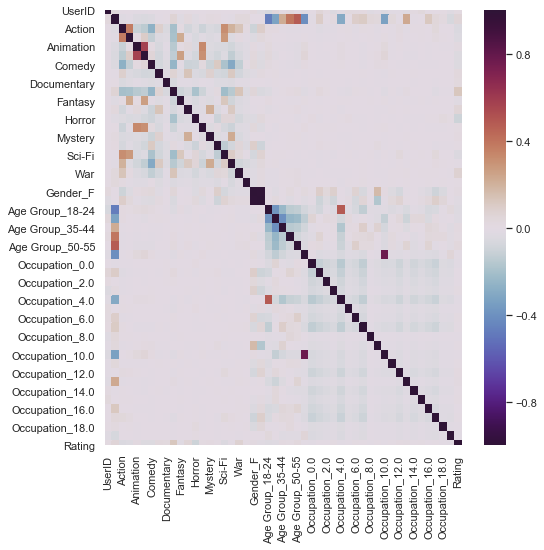

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(XY.corr(), annot=False, cmap = "twilight_shifted")

Develop an appropriate model to predict the movie ratings

In [42]:
X = X[1000:].values
Y = Y[1000:].values
train, test, train_labels, test_labels = train_test_split(X,Y,test_size=0.33,random_state=42)

We have used columns like Gender, occupation, age and Genre to get the rating predictions here. 

Decision Tree

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = accuracy_score(test_labels, Y_pred)*100
print(acc_decision_tree) #35 accuracy score

35.04923591082644


Random Forest Classifier

In [44]:
clf = RandomForestClassifier()

clf.fit(train, train_labels)

pred_train = clf.predict(train)
pred_test = clf.predict(test)

accuracy_train = accuracy_score(pred_train,train_labels)
accuracy_test = accuracy_score(pred_test,test_labels)*100

print(accuracy_test) #35.6 accuracy score

/Users/shivamgupta/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


35.59239277125241
